# Part C – A* Search on a Maze 🗺️

This notebook demonstrates the A* search algorithm to find the shortest path in a 2D maze. We will implement the core algorithm and then explore how different heuristic functions affect its performance and optimality.

## 1. Core A* Search Implementation

The maze is represented as a 2D matrix:
- `1` = Wall (impassable)
- `0` = Free Path (passable)
- **A** = Start Point
- **B** = Goal Point

A* uses an `f-score` to decide which node to explore next, calculated as: 
$$f(n) = g(n) + h(n)$$

- **g(n)**: The actual cost from the start node to node `n`.
- **h(n)**: The estimated cost from node `n` to the goal node (the heuristic).

We use **Manhattan distance** as our base heuristic. It is calculated by summing the absolute differences of the coordinates. This heuristic is both **admissible** (it never overestimates the true cost) and **consistent** (it obeys the triangle inequality), which guarantees an optimal solution. 

!

Starting A* Pathfinding...
Grid Dimensions: (10, 10)
Start Position: (0, 0)
Goal Position: (9, 9)

Path successfully found!
Total cost of the path: 18


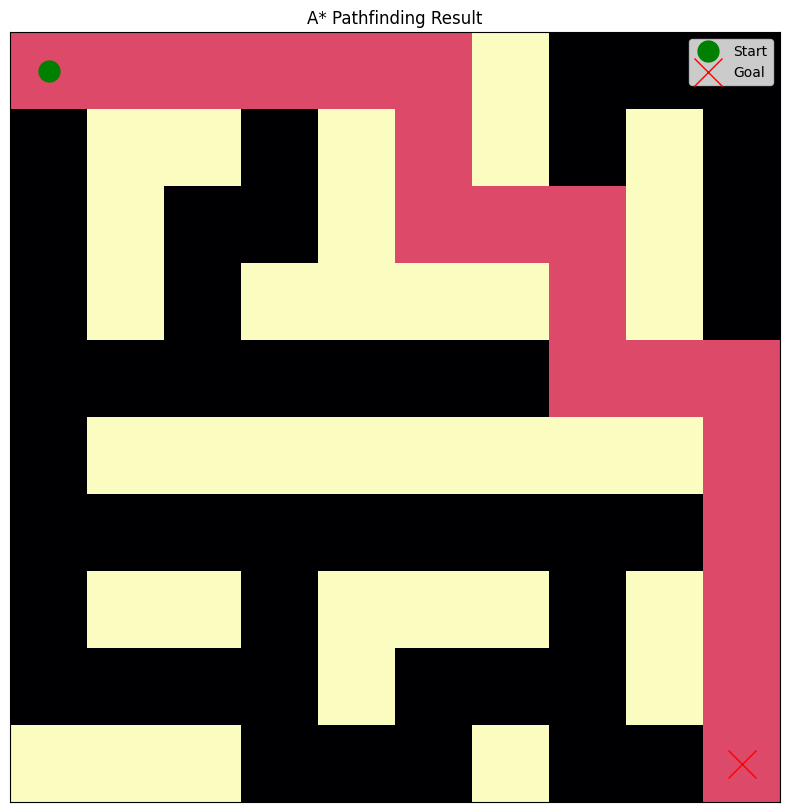

In [1]:
import heapq
import numpy as np
import matplotlib.pyplot as plt

def manhattan_distance(node_a, node_b):
    (r1, c1) = node_a
    (r2, c2) = node_b
    return abs(r1 - r2) + abs(c1 - c2)

def trace_path(parent_map, start_node, end_node):
    path = [end_node]
    current_node = end_node
    while current_node != start_node:
        current_node = parent_map[current_node]
        path.append(current_node)
    return path[::-1]

def find_path_astar(grid, start_pos, end_pos, heuristic_func=manhattan_distance):
    grid_rows, grid_cols = grid.shape
    priority_queue = [(0, start_pos)]
    parent_nodes = {}
    cost_from_start = {start_pos: 0}
    estimated_total_cost = {start_pos: heuristic_func(start_pos, end_pos)}
    
    while priority_queue:
        _, current_node = heapq.heappop(priority_queue)
        
        if current_node == end_pos:
            path = trace_path(parent_nodes, start_pos, end_pos)
            cost = cost_from_start[end_pos]
            return path, cost
            
        moves = [(-1, 0), (1, 0), (0, -1), (0, 1)]
        
        for move_r, move_c in moves:
            neighbor_pos = (current_node[0] + move_r, current_node[1] + move_c)
            
            if not (0 <= neighbor_pos[0] < grid_rows and 0 <= neighbor_pos[1] < grid_cols):
                continue
            if grid[neighbor_pos] == 1:
                continue
            
            tentative_cost = cost_from_start[current_node] + 1
            
            if tentative_cost < cost_from_start.get(neighbor_pos, float('inf')):
                parent_nodes[neighbor_pos] = current_node
                cost_from_start[neighbor_pos] = tentative_cost
                
                f_score = tentative_cost + heuristic_func(neighbor_pos, end_pos)
                heapq.heappush(priority_queue, (f_score, neighbor_pos))
                
    return None, 0

def draw_grid(grid, path=None, start=None, end=None):
    grid_viz = grid.copy().astype(float)
    
    if path:
        for r, c in path:
            grid_viz[r, c] = 0.6
    
    plt.figure(figsize=(10, 10))
    plt.imshow(grid_viz, cmap='magma', interpolation='nearest')
    plt.title("A* Pathfinding Result")
    
    if start:
        plt.plot(start[1], start[0], 'go', markersize=15, label='Start')
    if end:
        plt.plot(end[1], end[0], 'rx', markersize=20, label='Goal')

    plt.xticks([])
    plt.yticks([])
    plt.legend()
    plt.show()

grid_layout = [
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 1, 1, 0, 1, 0, 1, 0, 1, 0],
    [0, 1, 0, 0, 1, 0, 0, 0, 1, 0],
    [0, 1, 0, 1, 1, 1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 1, 1, 1, 0, 1, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
    [1, 1, 1, 0, 0, 0, 1, 0, 0, 0]
]

grid = np.array(grid_layout)
start_point = (0, 0)
goal_point = (9, 9)

print("Starting A* Pathfinding...")
print(f"Grid Dimensions: {grid.shape}")
print(f"Start Position: {start_point}")
print(f"Goal Position: {goal_point}\n")

found_path, path_cost = find_path_astar(grid, start_point, goal_point)

if found_path:
    print("Path successfully found!")
    print(f"Total cost of the path: {path_cost}")
    
    draw_grid(grid, path=found_path, start=start_point, end=goal_point)
else:
    print("Could not find a path from the start to the goal.")

--- 

## 2. Modified Heuristics

Let's observe the behavior of A* when the heuristic is modified. A key property of A* is its optimality, which is guaranteed when using an **admissible** and **consistent** heuristic.

### Case 1: Scaled Heuristic (Inadmissible)

We multiply the Manhattan distance by a factor of 1.5. This new heuristic is **inadmissible** because it can now overestimate the cost to the goal. While this may cause the algorithm to find a path faster by more aggressively moving towards the goal, it can no longer guarantee the path is the shortest possible.

Case 1: A* with Scaled Manhattan Distance (1.5x)
Path found with cost: 18
Is optimal: True


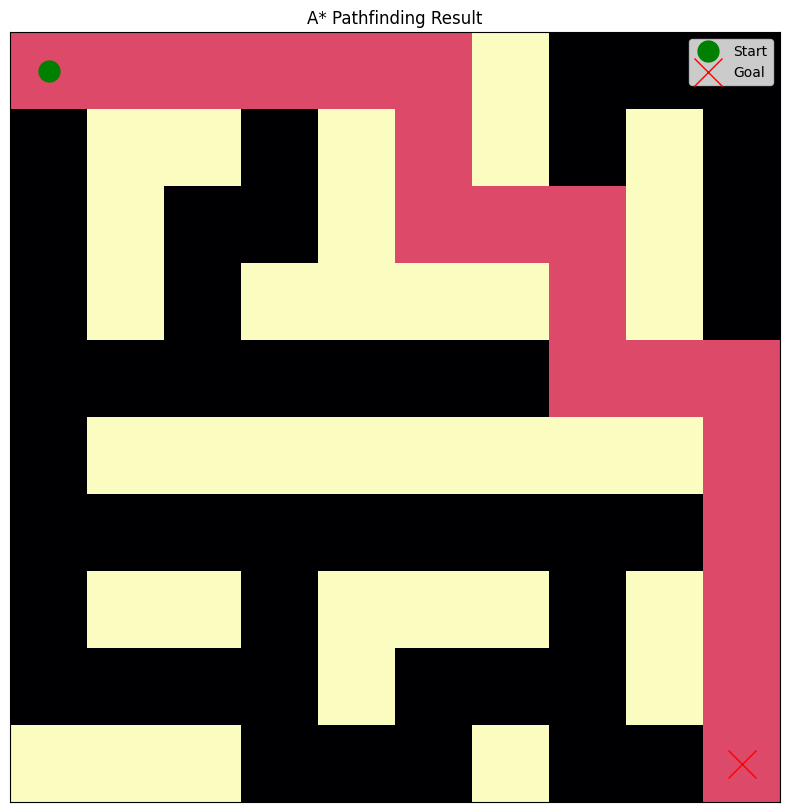

In [2]:
def scaled_manhattan(node_a, node_b):
    return 1.5 * manhattan_distance(node_a, node_b)

print("Case 1: A* with Scaled Manhattan Distance (1.5x)")
scaled_path, scaled_cost = find_path_astar(grid, start_point, goal_point, scaled_manhattan)

if scaled_path:
    print(f"Path found with cost: {scaled_cost}")
    print(f"Is optimal: {scaled_cost == path_cost}")
    draw_grid(grid, path=scaled_path, start=start_point, end=goal_point)
else:
    print("No path found with scaled Manhattan distance.")

--- 

### Case 2: Inconsistent Heuristic

A heuristic is **consistent** if, for any node `n` and its neighbor `n'`, the following holds: 
$$h(n) \leq d(n, n') + h(n')$$

Here, `d(n, n')` is the cost to move between the nodes, which is 1 in our grid. An inconsistent heuristic violates this property for at least one edge. This can cause the algorithm to re-expand nodes, as it may discover a more optimal path to a node it has already closed. Let's create an inconsistent heuristic by artificially inflating the `h-score` for a specific node on the path.

Case 2: A* with Inconsistent Manhattan Distance
Path found with cost: 18
Is optimal: True


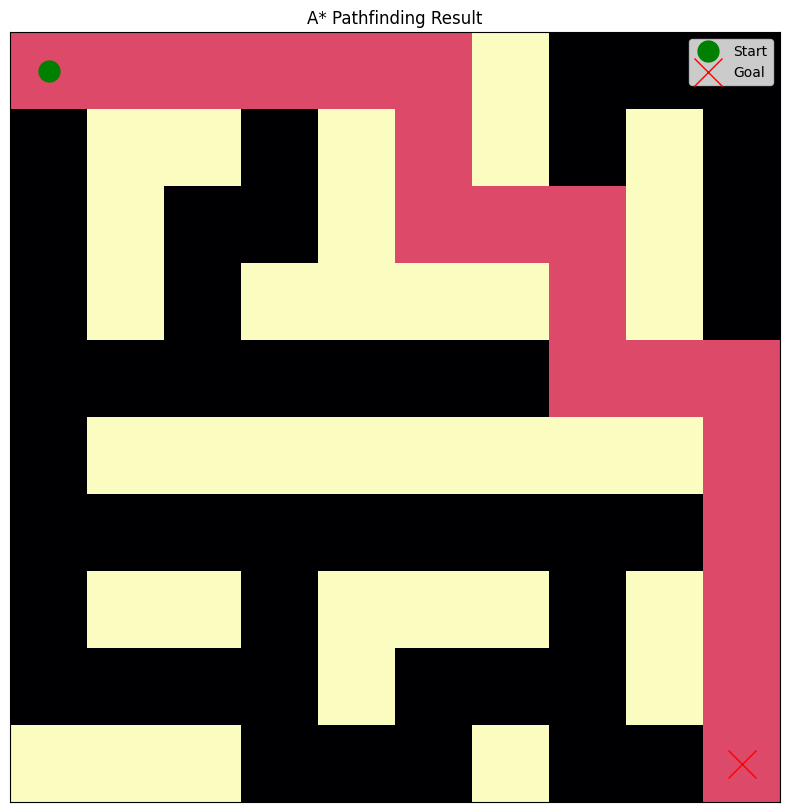

In [3]:
def inconsistent_manhattan(node_a, node_b):
    if node_a == (4, 4):
        return manhattan_distance(node_a, node_b) + 10
    return manhattan_distance(node_a, node_b)

print("Case 2: A* with Inconsistent Manhattan Distance")
inconsistent_path, inconsistent_cost = find_path_astar(grid, start_point, goal_point, inconsistent_manhattan)

if inconsistent_path:
    print(f"Path found with cost: {inconsistent_cost}")
    print(f"Is optimal: {inconsistent_cost == path_cost}")
    draw_grid(grid, path=inconsistent_path, start=start_point, end=goal_point)
else:
    print("No path found with inconsistent Manhattan distance.")

--- 

## 3. Summary of Results



In [6]:
print("Summary of Results")
print("Heuristic Type | Path Cost | Optimal")
print("---------------|-----------|---------")
print(f"Manhattan      | {path_cost:9} | {scaled_cost == path_cost if found_path else 'N/A'}")
if scaled_path:
    print(f"Scaled (1.5x)  | {scaled_cost:9} | {scaled_cost == path_cost}")
if inconsistent_path:
    print(f"Inconsistent   | {inconsistent_cost:9} | {inconsistent_cost == path_cost}")
    
    


Summary of Results
Heuristic Type | Path Cost | Optimal
---------------|-----------|---------
Manhattan      |        18 | True
Scaled (1.5x)  |        18 | True
Inconsistent   |        18 | True


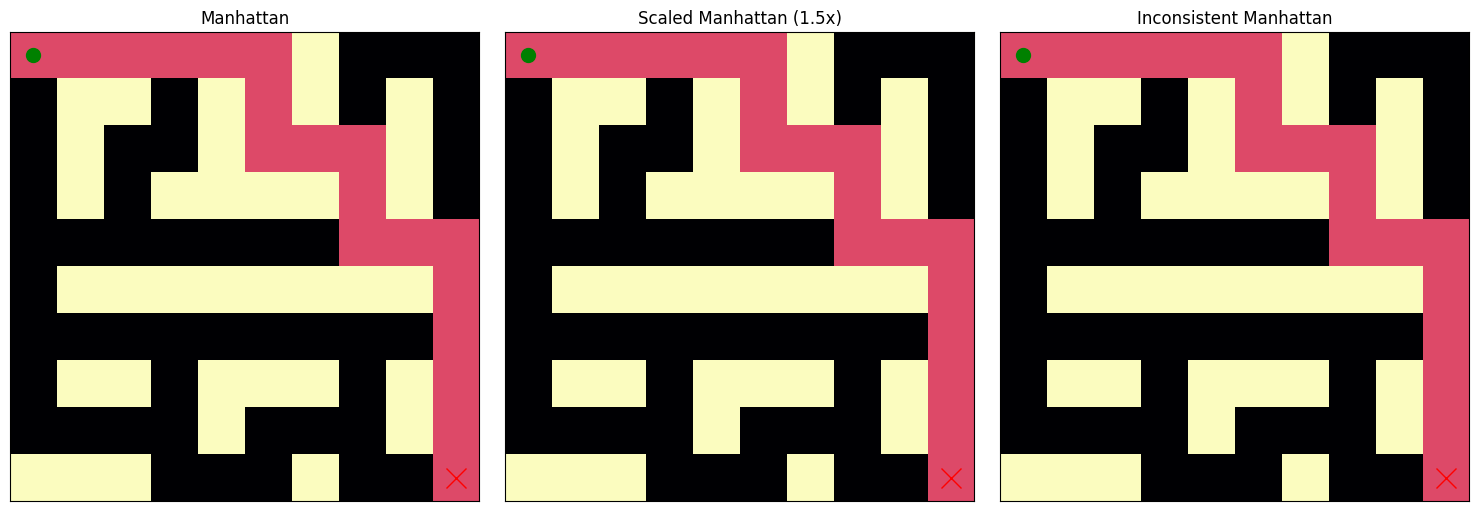

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

paths = [found_path, scaled_path, inconsistent_path]
titles = ["Manhattan", "Scaled Manhattan (1.5x)", "Inconsistent Manhattan"]

for i, (ax, path, title) in enumerate(zip(axes, paths, titles)):
    grid_viz = grid.copy().astype(float)
    
    if path:
        for r, c in path:
            grid_viz[r, c] = 0.6
    
    ax.imshow(grid_viz, cmap='magma', interpolation='nearest')
    ax.set_title(title)
    ax.plot(start_point[1], start_point[0], 'go', markersize=10)
    ax.plot(goal_point[1], goal_point[0], 'rx', markersize=15)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()